# Bitcoin Sentiment-Price Correlation
## Inputs
We use the average polarity scores and the closing prices of Bitcoin from August 8 to September 7, 2018.

In [81]:
sentiments = [0.1148378151260504,0.10054880187025132,0.1320964596633778,0.13114851605087824,0.12055378205128203,0.0737112239142696,0.08774400221116639,0.10814579489962019,0.12714464882943144,0.12790344009489915,0.12617892791127544,0.11751586287042418,0.11101584158415842,0.07804477611940298,0.0945551724137931,0.09388588503130335,0.11590802248339295,0.1265067281606077,0.11124482225656877,0.11794166666666667,0.12069146775012697,0.16124164256795834,0.11008077544426494,0.12266835016835016,0.1107218982275586,0.1354550684931507,0.11982024866785078,0.13218563411896744,0.09573690415171705,0.09506849315068491,0.12344048467569496]
prices = [6543.24,6153.41,6091.14,6091.14,6263.2,6199.6,6274.22,6323.81,6591.16,6405.71,6502.18,6269.9,6491.11,6366.13,6538.95,6708.96,6749.56,6720.6,6915.73,7091.38,7052,6998.76,7026.96,7203.46,7301.26,7270.05,7369.86,6705.03,6515.42,6426.33,6427.89]

## Graphical Analysis

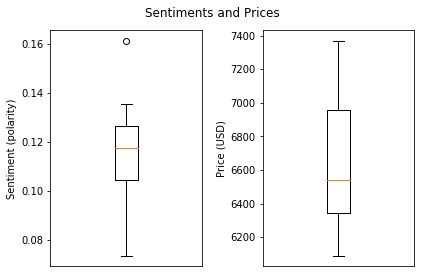

In [82]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(1)
plt.suptitle('Sentiments and Prices')

# Sentiments boxplot
plt.subplot(121)
plt.boxplot(sentiments)
plt.ylabel('Sentiment (polarity)')
plt.xticks([])

# Prices boxplot
plt.subplot(122)
plt.boxplot(prices)
plt.ylabel('Price (USD)')
plt.xticks([])

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

We see one outlier (*approximately 0.16*) in our sentiment dataset.

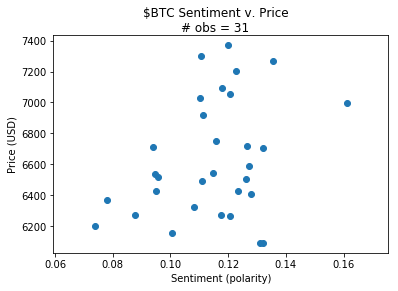

In [83]:
plt.figure(2)
plt.scatter(x=sentiments, y=prices)
plt.suptitle('$BTC Sentiment v. Price\n# obs = 31')
plt.ylabel('Price (USD)')
plt.xlabel('Sentiment (polarity)')
plt.show()

## Regression


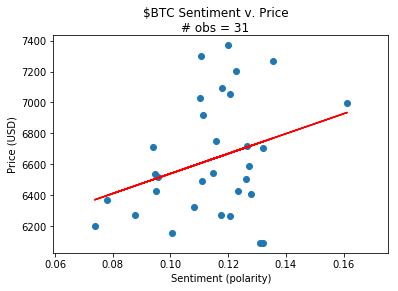

Intercept:   5894.182390072815
Slope:       6453.203545109107
Correlation: 0.31132136753415407
R-squared:   0.09692099388333585
p-value:     0.08823306157092385
t-statistic: 1.7641887782716776


In [84]:
from scipy import stats
slope, intercept, r_value, p_value, std_err = stats.linregress(x=sentiments, y=prices)

plt.figure(2)
plt.scatter(sentiments, prices)
plt.plot(sentiments, [intercept + slope*x for x in sentiments], 'r')
plt.suptitle('$BTC Sentiment v. Price\n# obs = 31')
plt.ylabel('Price (USD)')
plt.xlabel('Sentiment (polarity)')
plt.show()

print('Intercept:   {}\n'
      'Slope:       {}\n'
      'Correlation: {}\n'
      'R-squared:   {}\n'
      'p-value:     {}\n'
      't-statistic: {}'
      .format(intercept, slope, r_value, r_value**2, p_value, slope/std_err))

## Evaluation
We want to determine whether sentiment and price have a positive correlation. Lets test this against the null hypothesis that their correlation coefficient is zero.

Let us declare our null and alternative hypotheses:

* $\text{Hypothesis H}_0: \rho = 0$
* $\text{Hypothesis H}_A: \rho > 0$

From our above regression, we have: $\text{p-value} = Pr(T > t) = 0.0882 \text{.}$

Testing with a confidence level of 0.05, we fall outside the critical region. Thus we **fail to reject** our null hypothesis.

## How to Improve
To see the results we were expecting, we could run our inference on a dataset from a wider time interval, thereby reducing our standard error and p-value. 

In the sentiment analysis phase, we could additionally tune our classifier by training with domain-specific language and vocabulary. In the case that the keyword for a currency may return Tweets totally unrelated to what we intend (such as the case with *Dash* or *Neo*), we end up factoring in junk data into our average polarity scores. Filtering out these results would inprove the validity and accuracy of our inference.